In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore")

## 20Newsgroups

In [2]:
from sklearn.datasets import fetch_20newsgroups

In [55]:
newsgroups_train = sklearn.datasets.fetch_20newsgroups(data_home='/home/jovyan/work/seminar_6/', 
                                    subset='train',
                                    download_if_missing=False)
newsgroups_test = sklearn.datasets.fetch_20newsgroups(data_home='/home/jovyan/work/seminar_6/', 
                                    subset='test',
                                    download_if_missing=False)

In [56]:
newsgroups_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [57]:
print (newsgroups_train.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







### 1. Предварительная обработка текста

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import tqdm


def preprocess_text(texts):
    stop_words = set(stopwords.words('english'))
    regex = re.compile('[^a-z A-Z]')
    preprocess_texts = []
    for i in  tqdm.tqdm(range(len(texts))):
        text = texts[i].lower()
        text = regex.sub(' ', text)
        word_tokens = word_tokenize(text) 
        filtered_sentence = [w for w in word_tokens if not w in stop_words] 
        preprocess_texts.append( ' '.join(filtered_sentence))
    
    return preprocess_texts

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
newsgroups_train['preprocess_data'] = preprocess_text(newsgroups_train.data)

100%|██████████| 11314/11314 [00:17<00:00, 653.60it/s]


In [ ]:
newsgroups_test['preprocess_data'] = preprocess_text(newsgroups_test.data)

100%|██████████| 7532/7532 [00:10<00:00, 693.23it/s]


In [ ]:
print(newsgroups_train['preprocess_data'][0])

lerxst wam umd edu thing subject car nntp posting host rac wam umd edu organization university maryland college park lines wondering anyone could enlighten car saw day door sports car looked late early called bricklin doors really small addition front bumper separate rest body know anyone tellme model name engine specs years production car made history whatever info funky looking car please e mail thanks il brought neighborhood lerxst


In [ ]:
from nltk.stem.lancaster import LancasterStemmer

In [ ]:
def stemming_texts(texts):
  st = LancasterStemmer()
  stem_text = []
  for text in tqdm.tqdm(texts):
    word_tokens = word_tokenize(text)
    stem_text.append(' '.join([st.stem(word) for word in word_tokens]))
  return stem_text

In [ ]:
newsgroups_train['data_stemming'] = \
                           stemming_texts(newsgroups_train.preprocess_data)

100%|██████████| 11314/11314 [00:36<00:00, 307.52it/s]


In [ ]:
newsgroups_test['data_stemming'] = \
                            stemming_texts(newsgroups_test.preprocess_data)

100%|██████████| 7532/7532 [00:23<00:00, 322.17it/s]


In [ ]:
print(newsgroups_train.data_stemming[0])

lerxst wam umd edu thing subject car nntp post host rac wam umd edu org univers maryland colleg park lin wond anyon could enlight car saw day door sport car look lat ear cal bricklin door real smal addit front bump sep rest body know anyon tellm model nam engin spec year produc car mad hist whatev info funky look car pleas e mail thank il brought neighb lerxst


In [ ]:
print(newsgroups_train.preprocess_data[0])

lerxst wam umd edu thing subject car nntp posting host rac wam umd edu organization university maryland college park lines wondering anyone could enlighten car saw day door sports car looked late early called bricklin doors really small addition front bumper separate rest body know anyone tellme model name engine specs years production car made history whatever info funky looking car please e mail thanks il brought neighborhood lerxst


### 2. Перевод текста в вещественное пространство признаков

#### 2.1 Bag of Words (мешок слов)

Основное предположение данного метода — порядок слов в документе не важен, 

а все документы представляются в виде матрицы $ T = (t)_{d,w}$,

каждая строка в которой соответствует отдельному документу или тексту, 

а каждый столбец — определенному слову. 

Элемент $t_{d,w}$ соответствует количеству вхождений слова $w$ в документ $d$.







In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer()

In [ ]:
vectorizer.fit(['порядок слов в документе не важен', 'мешок слов'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
vectorizer.get_feature_names()

['важен', 'документе', 'мешок', 'не', 'порядок', 'слов']

In [ ]:
vectorizer.transform(['важен порядок', 'не мешок не порядок']).toarray()

array([[1, 0, 0, 0, 1, 0],
       [0, 0, 1, 2, 1, 0]])

In [ ]:
def bow(vectorizer, train, test):
  train_bow = vectorizer.fit_transform(train)
  test_bow = vectorizer.transform(test)
  return train_bow, test_bow

In [ ]:
X_train_bow, X_test_bow = bow(vectorizer, 
                              newsgroups_train.data, 
                              newsgroups_test.data)

In [ ]:
X_train_bow.shape

(11314, 130107)

In [ ]:
X_test_bow.shape

(7532, 130107)

In [ ]:
X_train_bow_preprocess, X_test_bow_preprocess = bow(vectorizer, 
                                                    newsgroups_train.preprocess_data,
                                                    newsgroups_test.preprocess_data)

In [ ]:
X_train_bow_preprocess.shape

(11314, 88863)

In [ ]:
X_test_bow_preprocess.shape

(7532, 88863)

In [ ]:
X_train_bow_stem, X_test_bow_stem = bow(vectorizer, 
                                        newsgroups_train.data_stemming,
                                        newsgroups_test.data_stemming)

In [ ]:
X_train_bow_stem.shape

(11314, 61221)

In [ ]:
X_test_bow_stem.shape

(7532, 61221)

#### 2.2 Bag of Words & TF IDF

$TF-IDF$ — это статистическая мера, используемая для оценки

важности слова в контексте документа. Вычисляется по формуле:

$$TF-IDF(w, d, D) = TF(w, d) × IDF(w, D)$$

$TF$ — частота слова, оценивает важность слова $w_i$ в пределах отдельного документа.

$$TF(w, d) = \frac{n_i}{\sum_k n_k}$$

$n_i$ — число вхождений слова $i$ в документ.

$\sum_k n_k$ — общее число слов в данном документе.

$IDF$ — обратная частота документа. 

Учёт $IDF$ уменьшает вес широко употребляемых слов.
$$IDF(w, D) = \log \frac{|D|}{|w_i \subset d_i|}, \text{где}$$

$|D|$ — количество документов в корпусе.

$|w_i \subset d_i|$ — количество документов,

в которых встречается слово $w_i$.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer_tf_idf = TfidfVectorizer()

In [ ]:
X_train_tfidf, X_test_tfidf = bow(vectorizer_tf_idf, 
                                  newsgroups_train.data, 
                                  newsgroups_test.data)

In [ ]:
X_train_tfidf_preprocess, X_test_tfidf_preprocess = bow(vectorizer_tf_idf,
                                                        newsgroups_train.preprocess_data,
                                                        newsgroups_test.preprocess_data)

In [ ]:
X_train_tfidf_stem, X_test_tfidf_stem = bow(vectorizer_tf_idf,
                                            newsgroups_train.data_stemming,
                                            newsgroups_test.data_stemming)

In [ ]:
vectorizer_ngram = TfidfVectorizer(ngram_range=(1,2))

In [ ]:
X_train_ngram_stem, X_test_ngram_stem = bow(vectorizer_ngram, 
                                            newsgroups_train.data_stemming,
                                            newsgroups_test.data_stemming)

In [ ]:
X_train_ngram_stem.shape

(11314, 934463)

In [ ]:
X_test_ngram_stem.shape

(7532, 934463)

### 3. Выбор алгоритма машинного обучения для классификации.

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [ ]:
from sklearn.svm import LinearSVC
clf_svc = LinearSVC()

In [ ]:
clf.fit(X_train_bow, newsgroups_train.target)
print ('LogisticRegression: ',
       accuracy_score(clf.predict(X_test_bow), newsgroups_test.target))

clf_svc.fit(X_train_bow, newsgroups_train.target)
print ('LinearSVC: ',
       accuracy_score(clf_svc.predict(X_test_bow), newsgroups_test.target))

LogisticRegression:  0.8069569835369091
LinearSVC:  0.7858470525756771


In [ ]:
clf.fit(X_train_bow_preprocess, newsgroups_train.target)
print ('LogisticRegression: ',
       accuracy_score(clf.predict(X_test_bow_preprocess),
                      newsgroups_test.target))

clf_svc.fit(X_train_bow_preprocess, newsgroups_train.target)
print ('LinearSVC: ',
       accuracy_score(clf_svc.predict(X_test_bow_preprocess),
                      newsgroups_test.target))



LogisticRegression:  0.811603823685608
LinearSVC:  0.7928836962294211


In [ ]:
clf.fit(X_train_bow_stem, newsgroups_train.target)
print ('LogisticRegression: ',
       accuracy_score(clf.predict(X_test_bow_stem),
                      newsgroups_test.target))

clf_svc.fit(X_train_bow_stem, newsgroups_train.target)
print ('LinearSVC: ',
       accuracy_score(clf_svc.predict(X_test_bow_stem),
                      newsgroups_test.target))

LogisticRegression:  0.8050982474774296
LinearSVC:  0.7812002124269782


In [ ]:
clf.fit(X_train_tfidf, newsgroups_train.target)
print ('LogisticRegression: ',
       accuracy_score(clf.predict(X_test_tfidf), newsgroups_test.target))

clf_svc.fit(X_train_tfidf, newsgroups_train.target)
print ('LinearSVC: ',
       accuracy_score(clf_svc.predict(X_test_tfidf), newsgroups_test.target))

LogisticRegression:  0.8279341476367499
LinearSVC:  0.8531598513011153


In [ ]:
clf.fit(X_train_tfidf_preprocess, newsgroups_train.target)
print ('LogisticRegression: ',
        accuracy_score(clf.predict(X_test_tfidf_preprocess), 
                       newsgroups_test.target))

clf_svc.fit(X_train_tfidf_preprocess, newsgroups_train.target)
print ('LinearSVC: ',
        accuracy_score(clf_svc.predict(X_test_tfidf_preprocess), 
                       newsgroups_test.target))

LogisticRegression:  0.831651619755709
LinearSVC:  0.8509028146574615


In [ ]:
clf.fit(X_train_tfidf_stem, newsgroups_train.target)
print ('LogisticRegression: ',
       accuracy_score(clf.predict(X_test_tfidf_stem), 
                      newsgroups_test.target))

clf_svc.fit(X_train_tfidf_stem, newsgroups_train.target)
print ('LinearSVC: ',
       accuracy_score(clf_svc.predict(X_test_tfidf_stem),
                      newsgroups_test.target))

LogisticRegression:  0.8244822092405736
LinearSVC:  0.8437334041423261


In [ ]:
clf.fit(X_train_ngram_stem, newsgroups_train.target)
print ('LogisticRegression: ',
       accuracy_score(clf.predict(X_test_ngram_stem), 
                      newsgroups_test.target))

clf_svc.fit(X_train_ngram_stem, newsgroups_train.target)
print ('LinearSVC: ',
       accuracy_score(clf_svc.predict(X_test_ngram_stem),
                      newsgroups_test.target))

LogisticRegression:  0.8275358470525757
LinearSVC:  0.8555496548061604


In [ ]:
import seaborn
from sklearn.metrics import confusion_matrix

In [ ]:
predict_targets = clf_svc.predict(X_test_ngram_stem)

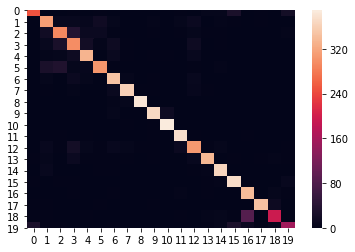

In [ ]:
seaborn.heatmap(confusion_matrix(newsgroups_test.target, predict_targets))

In [ ]:
newsgroups_test.target_names[18]

'talk.politics.misc'

In [ ]:
newsgroups_test.target_names[16]

'talk.politics.guns'

In [ ]:
ind = np.where(newsgroups_test.target != predict_targets)
ind = ind[0]
random_ind = np.random.randint(0,ind.shape[0],(2))
for i in random_ind:
    img=newsgroups_test.data[ind[i]]
    print ('Правильный класс: ', 
           newsgroups_test.target_names[newsgroups_test.target[ind[i]]])
    print ('Предсказанный класс: ', 
           newsgroups_test.target_names[predict_targets[ind[i]]])
    print(img)


Правильный класс:  comp.windows.x
Предсказанный класс:  comp.sys.mac.hardware
From: dean@gene.med.umn.edu (Dean Flanders (IHG))
Subject: Planet X
Nntp-Posting-Host: gene.med.umn.edu
Organization: University of Minnesota
X-Newsreader: TIN [version 1.1 PL9]
Lines: 28

Does any one out there have experience with Planet X, I am
considering buying it to use on a SPARCstation IPC, in this
way I can run Mac programs from the SPARC.

Would you recommend buying this piece of Software and what is
the emulation on the SPARC like?  Does it give a window of a
Mac or does it give a window of just the individual programs?

Any information would be greatly appreciated.

Thanks,

Dean

Institute of Human Genetics           I
University of Minnesota               I
Box 206 UMHC                          I    "If all you have is a hammer,
Harvard Street at East River Road     I     you tend to look at every
Minneapolis, MN  55455                I     problem as a nail."
                                   